# Basic Data Analysis Project-II

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#display wide tables 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

We have a list of 10,000 movies with IMDB user rating as `imdb.txt`. We want to perform a exploratory data analysis of this data in Python by using its Pandas library.  We will perform the cleaning, transformation and then visualization on the raw data. This will help us to understand the data for further processing.

In [34]:
# !cat datasets/imdb.txt

## 1. Loading data

Read the imdb.txt into dataframe named data. The data is tab delimited. The columns names are 'imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'

In [35]:
# Your code here
df = pd.read_csv("../datasets/imdb.txt", delimiter ="\t", header=None)


In [36]:
df.columns = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']

In [37]:
df = df.dropna()
df

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...,...
9995,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
9996,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
9997,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller
9998,tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance


Check the data types of each column

In [38]:
# Your code here
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

## 2. Clean the DataFrame

The data frame has several problems

1. The runtime column is stored as a string
2. The genres column has several genres together. This way, it is hard to check which movies are Action movies and so on.
3. The movie year is also present in the title


### Fix the runtime column
Convert the string '142 mins' to number 142.

In [39]:
# Your code here
tmp_str = "142 mins"
print(tmp_str)
tmp_str = tmp_str.strip().split()[0]
print(tmp_str)


142 mins
142


Perform this conversion on every element in the dataframe `data` using `List Comprehesnion`.

In [40]:
# Your code here
df.runtime = pd.Series([ int( x.strip().split()[0] ) for x in df.runtime])
df.runtime

0       142.0
1       154.0
2       139.0
3       136.0
4       148.0
        ...  
9995    100.0
9996    104.0
9997    179.0
9998     96.0
9999      NaN
Name: runtime, Length: 9999, dtype: float64

If you are unable to do it, then execute the following

In [41]:
# with pd.HDFStore("data_1.h5") as store:
#     data = store["/data"]
    
# data.head()

In [42]:
# data.to_csv('data_1.csv', sep='\t')

### Split the genres

We would like to split the genres column into many columns. Each new column will correspond to a single genre, and each cell will be True or False.

First, we would like to find the all the unique genres present in any record. Its better to sort the genres to locate easily.

In [43]:
#determine the unique genres
all_genres = set()
def add_to_genres(genre_string):
    for el in genre_string.split("|"):
            all_genres.add(el)
        
df.genres.apply(add_to_genres)
all_genres_ordered = list(all_genres)
all_genres_ordered.sort()
all_genres_ordered

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

Then make a column for each genre

In [44]:
#make a column for each genre
for col in all_genres_ordered:
    df[col] = df.genres.apply(lambda x: col in x)

In [45]:
df.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142.0,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154.0,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139.0,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


### Eliminate year from the title
We can fix each element by stripping off the last 7 characters

In [46]:
#Strip off last 7 character from title
df.title = df.title.map(lambda x: x[:-7])

In [47]:
df.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154.0,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139.0,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


If you are unable to do it, then execute the following 

In [48]:
# with pd.HDFStore("data_2.h5") as store:
#     data = store["/data"]
    
# data.head()

In [49]:
# data.to_csv('data_2.csv', sep='\t')

## 3. Descriptive Statistics

Next, we would like to discover outliers. One possible way is to describe some basic, global summaries of the DataFrame on `score`, `runtime`, `year`, `votes`.

In [50]:
#Call `describe` on relevant columns
df.select_dtypes(include="number").describe()

,year,score,votes,runtime
count,9999.000000,9999.000000,9999.000000,9998.000000
mean,1993.471447,6.385989,16605.462946,103.580916
std,14.830049,1.189965,34564.883945,26.630583
min,1950.000000,1.500000,1356.000000,0.000000
25%,1986.000000,5.700000,2334.500000,93.000000
50%,1998.000000,6.600000,4981.000000,102.000000
75%,2005.000000,7.200000,15278.500000,115.000000
max,2011.000000,9.200000,619479.000000,450.000000


Do you see any quantity unusual. Better replace with NAN.

In [51]:
#Your code here
df.runtime = df.runtime.map(lambda x: np.nan if x == 0 else x)
df.select_dtypes(include="number").describe()

,year,score,votes,runtime
count,9999.000000,9999.000000,9999.000000,9716.000000
mean,1993.471447,6.385989,16605.462946,106.587279
std,14.830049,1.189965,34564.883945,20.231183
min,1950.000000,1.500000,1356.000000,45.000000
25%,1986.000000,5.700000,2334.500000,93.000000
50%,1998.000000,6.600000,4981.000000,103.000000
75%,2005.000000,7.200000,15278.500000,115.000000
max,2011.000000,9.200000,619479.000000,450.000000


Lets repeat describe to make sure that it is fine

In [52]:
#Your code here


### Basic plots

Lets draw histograms for release year, IMDB rating, runtime distribution

<Axes: xlabel='year', ylabel='Frequency'>

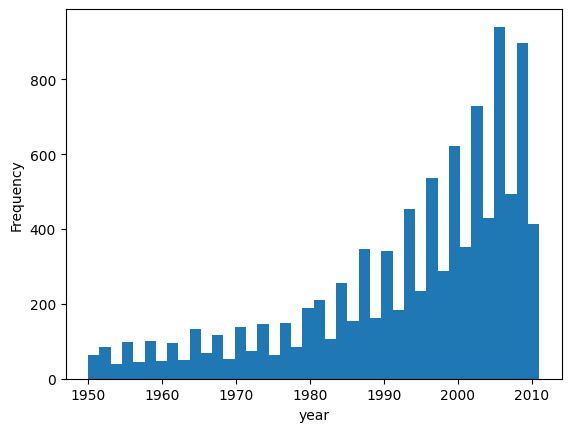

In [53]:
#Your code here
df.year.plot.hist(bins=40, xlabel="year")

<Axes: xlabel='score', ylabel='Frequency'>

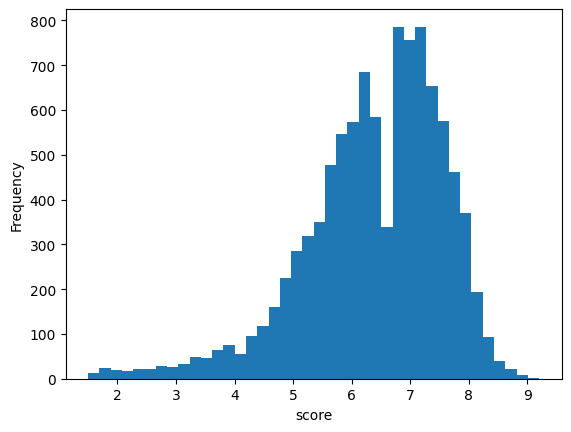

In [54]:
#Your code here
df.score.plot.hist(bins=40, xlabel="score")

<Axes: xlabel='runtime', ylabel='Frequency'>

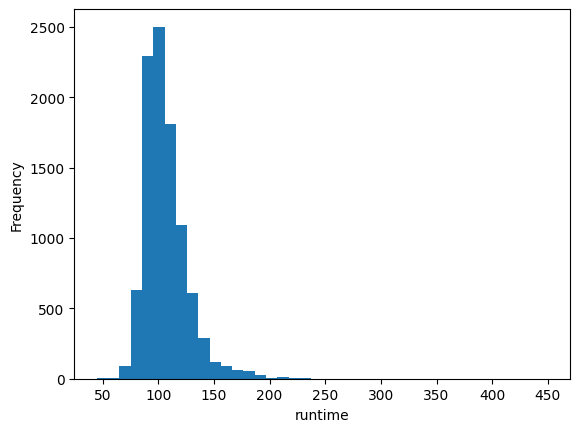

In [55]:
#Your code here
df.runtime.plot.hist(bins=40, xlabel="runtime")

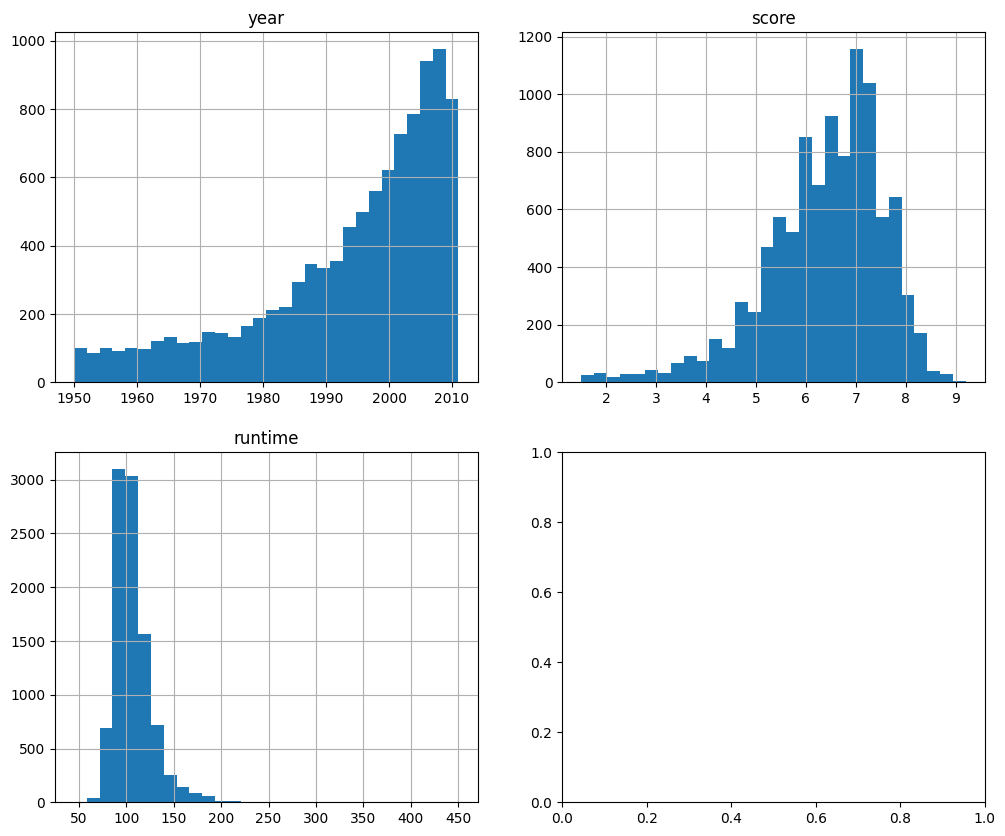

In [56]:
# all plots in one frame
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

for i, column in enumerate(['year', 'score', 'runtime']):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df[column].hist(bins=30, ax=ax)
    ax.set_title(column)
    ax.grid(True)

Scatter plot between IMDB rating and years. Does it shows some trend?

<Axes: xlabel='year', ylabel='score'>

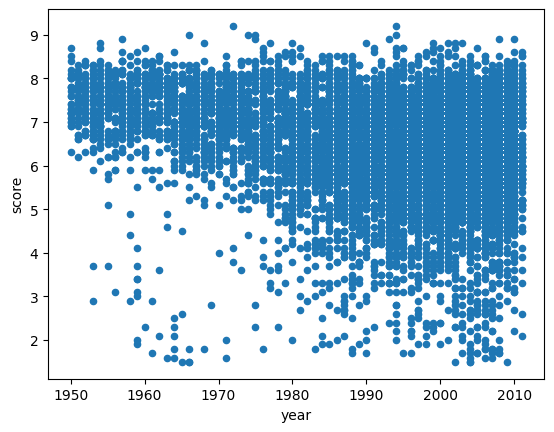

In [57]:
#Your code here
# plt.figure(figsize=(10,6))
# plt.hist2d(df.year, df.score, bins=60)
df.plot.scatter('year','score')

There is negative relationship between years and score of the moives. It means that by increasing of years the rating of movies are also decreasing.

Is there any relationship between IMDB rating and number of votes? Describe

<Axes: xlabel='score', ylabel='votes'>

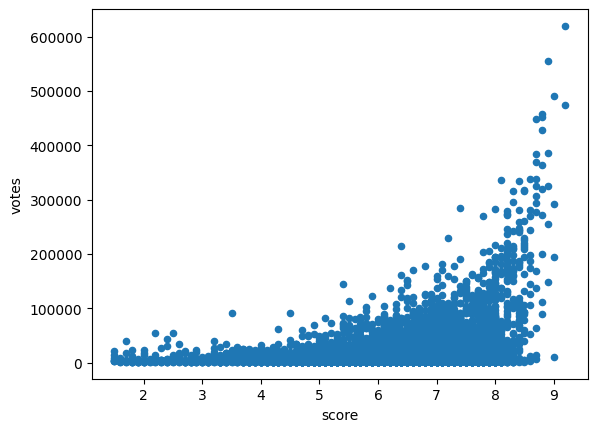

In [58]:
#Your code here
df.plot.scatter('score','votes')

<Axes: xlabel='votes', ylabel='score'>

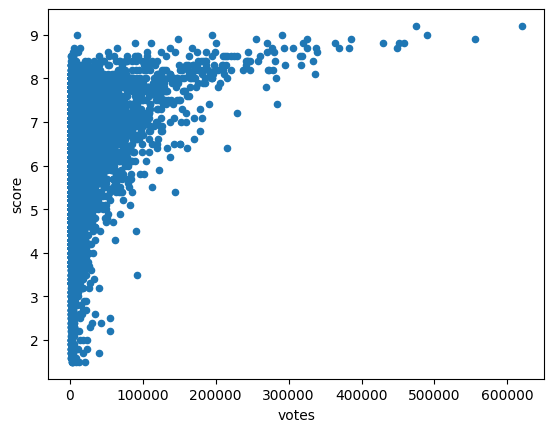

In [59]:
#Your code here
df.plot.scatter('votes','score')

There is some sort of positive relationship between score and votes.

### Data aggregation/Summarization

*What genres are the most frequent?* Lay down the genres in descending order of count

In [60]:
#Your code here
genre_series = df[all_genres_ordered].sum().sort_values()

Draw a bar plot to show top ten genres

<Axes: >

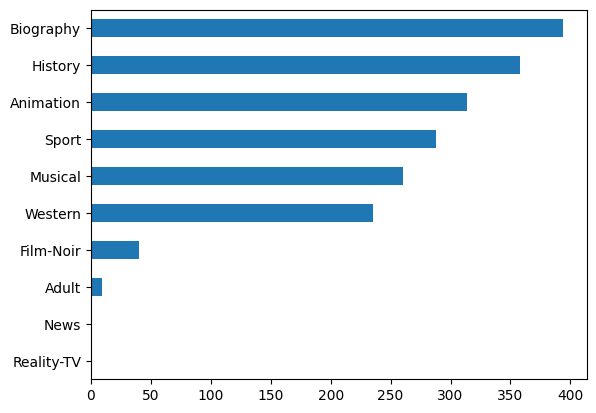

In [61]:
#Your code here
genre_series.head(10).plot.barh()

*How many genres does a movie have, on average?*

In [62]:
#Your code here
avg_num_genres = df[all_genres_ordered].sum(axis=1).sum() / df.shape[0]
avg_num_genres

2.7787778777877787

## Explore Group Properties

Let's split up movies by decade. Find the decade mean score and draw a plot as follows:

<img src=../images/score-year-plot.png>

1950
2011


C:\Users\mallo\AppData\Local\Temp\ipykernel_15084\3062314430.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averages = df.groupby('decades').agg({'score': 'mean'})


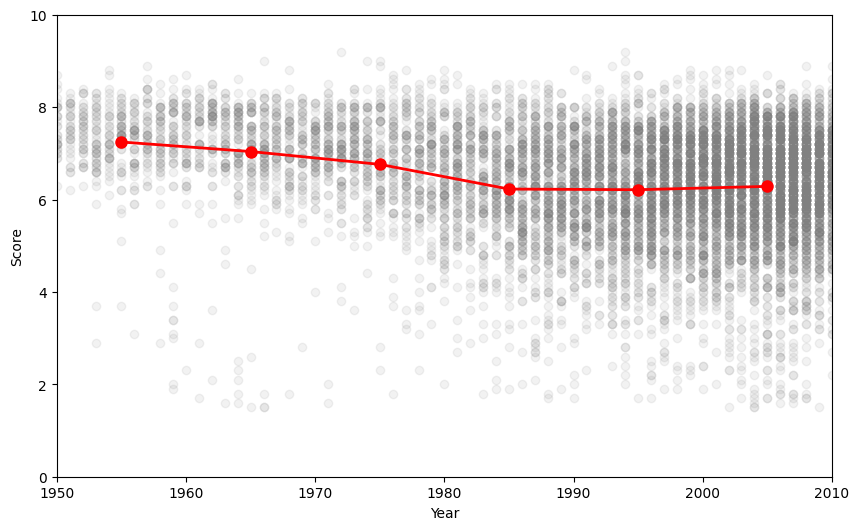

In [120]:
#Your code here
plt.figure(figsize=(10,6))

step = 10
bins = np.arange(1950, 2011, step)

print(df.year.min())
print(df.year.max())
df["decades"] = pd.cut(df.year, bins=bins, include_lowest=True)

averages = df.groupby('decades').agg({'score': 'mean'})
midpoints = bins[:-1]+5

plt.xlabel("Year")
plt.ylabel("Score")
plt.xlim(1950, 2010)
plt.ylim(0, 10)

plt.scatter(df.year, df.score, alpha=0.1, color='grey')
plt.plot(midpoints, averages['score'].values, color='red', linewidth=2, marker='o', markersize=8)

plt.show()

,decade,average-score
0,1950,7.244522
1,1960,7.062367
2,1970,6.842297
3,1980,6.248693
4,1990,6.199316
5,2000,6.278079
6,2010,6.344552


Find the most popular movie each year


In [130]:
#Your code here
grouped = df.groupby('year')
idx = grouped['score'].idxmax()
most_popular_movies = df.loc[idx]
most_popular_movies[['year','title']].set_index('year')

,title
year,
1950,Sunset Blvd.
1951,Strangers on a Train
1952,Singin' in the Rain
1953,The Wages of Fear
1954,Seven Samurai
...,...
2007,Like Stars on Earth
2008,The Dark Knight
2009,Inglourious Basterds
